<h1 style="text-align:center;">Plotting Reciever Routes Based on NFL Positional Data</h1>

<p style="text-align:center;">Vincent Etherton -- SML312: Research Projects in Data Science</p>

### Data Cleaning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
file = './updated/playsUpdated.csv'

plays = pd.read_csv(file)

In [14]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'DND', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'prePenaltyPlayResult',
       'playResult', 'absoluteYardlineNumber', 'offenseFormation',
       'personnelO', 'defendersInBox', 'personnelD', 'dropBackType',
       'pff_playAction', 'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

In [16]:
plays = plays.dropna(subset=['offenseFormation', 'personnelO', 'defendersInBox', 'personnelD', 'absoluteYardlineNumber', 'yardlineSide'])

In [18]:
file = 'nfl-big-data-bowl-2023/games.csv'

games = pd.read_csv(file)

In [19]:
reference_df = plays[['gameId', 'playId']]

In [20]:
weeks = ['Week0', 'Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6', 'Week7']

dfs = []
for week in weeks:
    file = f'./updated/{week}Updated.csv'
    dfs.append(pd.read_csv(file))
    
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085002 entries, 0 to 1085001
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1085002 non-null  int64  
 1   playId         1085002 non-null  int64  
 2   nflId          1037828 non-null  float64
 3   frameId        1085002 non-null  int64  
 4   time           1085002 non-null  object 
 5   jerseyNumber   1037828 non-null  float64
 6   team           1085002 non-null  object 
 7   playDirection  1085002 non-null  object 
 8   x              1085002 non-null  float64
 9   y              1085002 non-null  float64
 10  s              1085002 non-null  float64
 11  a              1085002 non-null  float64
 12  dis            1085002 non-null  float64
 13  o              1037828 non-null  float64
 14  dir            1037828 non-null  float64
 15  event          87101 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 132.4

In [21]:
for idx, df in enumerate(dfs):
    dfs[idx] = df.merge(reference_df, on=['gameId', 'playId'], how='inner')

dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085002 entries, 0 to 1085001
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1085002 non-null  int64  
 1   playId         1085002 non-null  int64  
 2   nflId          1037828 non-null  float64
 3   frameId        1085002 non-null  int64  
 4   time           1085002 non-null  object 
 5   jerseyNumber   1037828 non-null  float64
 6   team           1085002 non-null  object 
 7   playDirection  1085002 non-null  object 
 8   x              1085002 non-null  float64
 9   y              1085002 non-null  float64
 10  s              1085002 non-null  float64
 11  a              1085002 non-null  float64
 12  dis            1085002 non-null  float64
 13  o              1037828 non-null  float64
 14  dir            1037828 non-null  float64
 15  event          87101 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 132.4

The dataset from the NFL Big Data Bowl contains positional data for each play run in the 2021 NFL season. While it contains data for each of the 22 players on the field at any time, it also contains positional data for the football. This would be useful for future projects, but for now, we'll eliminate it by checking the 'team' column. If the team is 'football' it represents a position of the football at some time during the play.

In [22]:
for idx, df in enumerate(dfs):
    dfs[idx] = df[df['team'] != 'football']

dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037828 entries, 0 to 1084967
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1037828 non-null  int64  
 1   playId         1037828 non-null  int64  
 2   nflId          1037828 non-null  float64
 3   frameId        1037828 non-null  int64  
 4   time           1037828 non-null  object 
 5   jerseyNumber   1037828 non-null  float64
 6   team           1037828 non-null  object 
 7   playDirection  1037828 non-null  object 
 8   x              1037828 non-null  float64
 9   y              1037828 non-null  float64
 10  s              1037828 non-null  float64
 11  a              1037828 non-null  float64
 12  dis            1037828 non-null  float64
 13  o              1037828 non-null  float64
 14  dir            1037828 non-null  float64
 15  event          83314 non-null    object 
dtypes: float64(9), int64(3), object(4)
memory usage: 134.6+ MB


In [23]:
file = 'nfl-big-data-bowl-2023/pffScoutingData.csv'

pff_data = pd.read_csv(file)

pff_data = pff_data[pff_data['pff_role'] == 'Pass Route']
pff_data = pff_data[(pff_data['pff_positionLinedUp'] != 'QB') & (pff_data['pff_positionLinedUp'] != 'LT')]

In [24]:
plays['dropBackType'].unique()

array(['TRADITIONAL', 'SCRAMBLE_ROLLOUT_RIGHT', 'DESIGNED_ROLLOUT_RIGHT',
       nan, 'SCRAMBLE', 'DESIGNED_ROLLOUT_LEFT', 'UNKNOWN',
       'DESIGNED_RUN', 'SCRAMBLE_ROLLOUT_LEFT'], dtype=object)

We'll go through and eliminate all pass plays by filtering by the type of drop back and by parsing the string description of the play for the word 'pass'. The first filter should be sufficient as a designed pass play would be contained in a traditional or designed rollout format (speaking to QB movement after recieving the snap), but the string containing pass will ensure that only pass plays are filtered.

In [25]:
# Eliminate all non-pass plays
# pass_plays = plays[(plays['playDescription'].str.contains('pass')) | (~plays['dropBackType'].isin(['UNKNOWN', 'DESIGNED_RUN']))]
pass_plays = plays[(plays['dropBackType'].isin(['TRADITIONAL', 'DESIGNED_ROLLOUT_RIGHT', 'DESIGNED_ROLLOUT_LEFT'])) & (plays['playDescription'].str.contains('pass'))]

dfs_pass = []

for idx, df in enumerate(dfs):
    df_new = df.merge(pass_plays[['gameId', 'playId']], on=['gameId', 'playId'], how='inner')
    df_new = df_new.merge(pff_data[['gameId', 'playId', 'nflId']], on=['gameId', 'playId', 'nflId'], how='inner')
    dfs_pass.append(df_new)

print(dfs_pass[0]['event'].unique())
dfs_pass[0]['event'].value_counts()

[nan 'ball_snap' 'autoevent_passforward' 'pass_forward'
 'autoevent_ballsnap' 'line_set' 'play_action' 'pass_arrived'
 'autoevent_passinterrupted' 'fumble' 'fumble_offense_recovered'
 'man_in_motion' 'pass_outcome_caught' 'pass_outcome_incomplete'
 'pass_tipped' 'shift' 'huddle_break_offense' 'first_contact' 'handoff']


event
pass_forward                 4110
ball_snap                    4106
autoevent_passforward        2085
autoevent_ballsnap           2083
play_action                   708
pass_arrived                  211
autoevent_passinterrupted      79
line_set                       73
shift                          70
man_in_motion                  65
pass_tipped                    54
pass_outcome_incomplete        25
pass_outcome_caught            15
first_contact                   5
huddle_break_offense            4
fumble_offense_recovered        3
fumble                          3
handoff                         3
Name: count, dtype: int64

For easier visualization, we'll now standardize the direction of forward progress. The positional data is according to an xy-coordinate plane where the positive x direction is down the field towards the visitor team's endzone and the positive y direction is across the field towards the visitor team's sideline. We'll standardize the positive x direction to be forward progress for the offense and the positive y direction to be leftward across the field.

In [27]:
los_map = pass_plays.set_index(['gameId', 'playId'])['absoluteYardlineNumber'].to_dict()

def adjust_position(row):
    los = los_map.get((row['gameId'], row['playId']))
    direction = row['playDirection']
    
    if direction == 'right':
        row['x'] = row['x'] - los
    else:
        row['x'] = los - row['x']
    return row

for idx, df in enumerate(dfs_pass):
    dfs_pass[idx] = df.apply(adjust_position, axis=1)

Next, the positional data starts collecting 5-7 frames prior to the ball being snapped and a varying number of frames after the play is passed. If a receiver were to catch the ball, the 'event' for that given row in the positional data would be labeled as 'pass_arrived' only for that receiver. The receiver would then run after the catch until he is tackled and the play is stopped. We'll trim the length of each route by eliminating all frames prior to the ball snap and all frames after the pass arrived. In the case that the pass never arrived at a reciever, we will end it two frames after the forward pass.

In [28]:
trimmed_weeks = []

for idx, df in enumerate(dfs_pass):
    trimmed_data = []
    for (gameId, playId, jerseyNumber), player_data in df.groupby(['gameId', 'playId', 'jerseyNumber']):
        ball_snap_index = player_data[player_data['event'] == 'ball_snap'].index
        # if the pass play becomes a run play or the pass arrives, this will be our ending point
        end_play_index = player_data[player_data['event'].isin(['pass_arrived', 'run'])].index
        
        start_frame_idx = 0
        end_frame_idx = player_data.index[-1]
        if not ball_snap_index.empty:
            start_frame_idx = ball_snap_index[0]
        else:
            continue
            
        if not end_play_index.empty:
            end_frame_idx = end_play_index[0] + 2
        else:
            # in this case, the pass never arrived and we'll end the play 2 frames after the ball is thrown
            end_play_index = player_data[player_data['event'] == 'pass_forward'].index
            if not end_play_index.empty:
                end_frame_idx = end_play_index[0] + 2
            
        trim_player_data = player_data.loc[start_frame_idx:end_frame_idx]

        # We must have at least 20 frames of data to create an accurate Bezier curve representation
        if len(trim_player_data) >= 20:
            trimmed_data.append(trim_player_data)

    trimmed_week = pd.concat(trimmed_data).reset_index(drop=True)
    trimmed_weeks.append(trimmed_week)
    
trimmed_weeks[0].head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,41233.0,6,2021-09-10T00:26:31.600,13.0,TB,right,-0.99,16.20,0.00,0.00,0.00,129.28,4.76,ball_snap
1,2021090900,97,41233.0,7,2021-09-10T00:26:31.700,13.0,TB,right,-0.98,16.21,0.00,0.00,0.01,129.28,23.29,NaN
2,2021090900,97,41233.0,8,2021-09-10T00:26:31.800,13.0,TB,right,-0.97,16.22,0.02,0.55,0.01,127.86,41.24,NaN
3,2021090900,97,41233.0,9,2021-09-10T00:26:31.900,13.0,TB,right,-0.95,16.23,0.27,2.93,0.02,125.97,61.85,NaN
4,2021090900,97,41233.0,10,2021-09-10T00:26:32.000,13.0,TB,right,-0.91,16.25,0.64,3.88,0.04,125.17,61.07,NaN


We'll look at the first 6 weeks of the period just to lessen the amount of data.

In [29]:
combined_df = pd.concat(trimmed_weeks[:-2], axis=0, ignore_index=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684037 entries, 0 to 684036
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameId         684037 non-null  int64  
 1   playId         684037 non-null  int64  
 2   nflId          684037 non-null  float64
 3   frameId        684037 non-null  int64  
 4   time           684037 non-null  object 
 5   jerseyNumber   684037 non-null  float64
 6   team           684037 non-null  object 
 7   playDirection  684037 non-null  object 
 8   x              684037 non-null  float64
 9   y              684037 non-null  float64
 10  s              684037 non-null  float64
 11  a              684037 non-null  float64
 12  dis            684037 non-null  float64
 13  o              684037 non-null  float64
 14  dir            684037 non-null  float64
 15  event          66348 non-null   object 
dtypes: float64(9), int64(3), object(4)
memory usage: 83.5+ MB


In [30]:
combined_df.to_csv('./data/all_pos_no_std.csv')

We'll also standardize the x and y positions so that all routes start from the same location, namely zero.

In [32]:
for idx, df in enumerate(trimmed_weeks):
    df['x'] = df.groupby(['gameId', 'playId', 'nflId'])['x'].transform(lambda x: x - x.iloc[0])
    def standardize_y(y):
        start_y = y.iloc[0]
        if start_y > 26.65:  # Flip and re-center if starting on the left
            return -(y - start_y)
        else:  # Just re-center if starting on the right
            return y - start_y
    
    df['y'] = df.groupby(['gameId', 'playId', 'nflId'])['y'].transform(standardize_y)
    
trimmed_weeks[0].head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,41233.0,6,2021-09-10T00:26:31.600,13.0,TB,right,0.00,0.00,0.00,0.00,0.00,129.28,4.76,ball_snap
1,2021090900,97,41233.0,7,2021-09-10T00:26:31.700,13.0,TB,right,0.01,0.01,0.00,0.00,0.01,129.28,23.29,NaN
2,2021090900,97,41233.0,8,2021-09-10T00:26:31.800,13.0,TB,right,0.02,0.02,0.02,0.55,0.01,127.86,41.24,NaN
3,2021090900,97,41233.0,9,2021-09-10T00:26:31.900,13.0,TB,right,0.04,0.03,0.27,2.93,0.02,125.97,61.85,NaN
4,2021090900,97,41233.0,10,2021-09-10T00:26:32.000,13.0,TB,right,0.08,0.05,0.64,3.88,0.04,125.17,61.07,NaN


### Plotting the Data

Now, we'll practice plotting routes as it will help us visualize the performance of our models later.

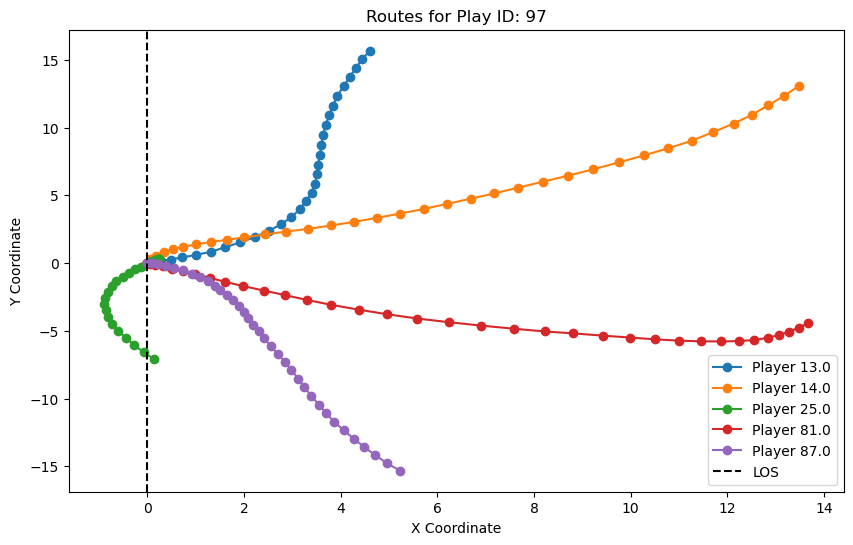

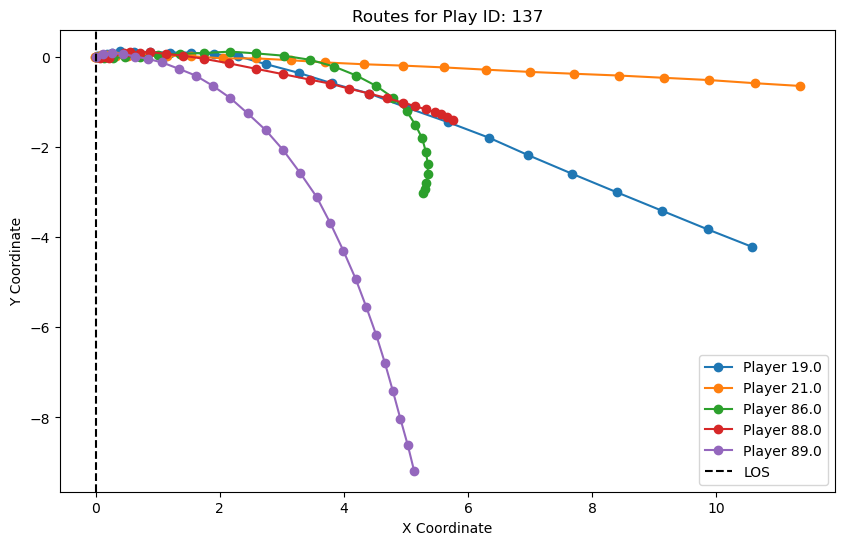

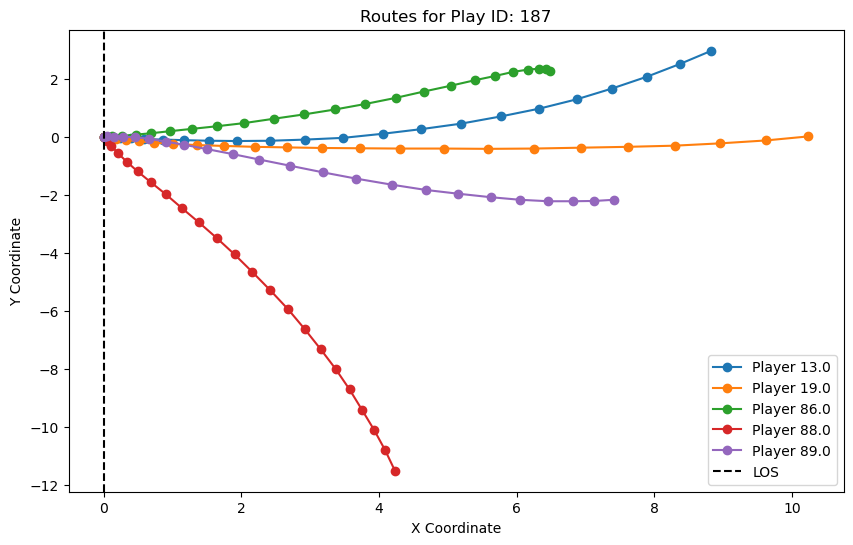

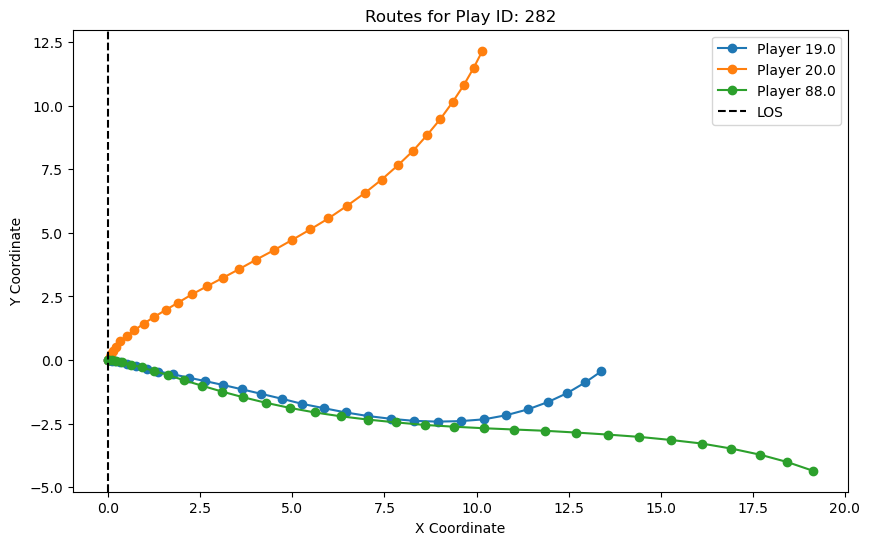

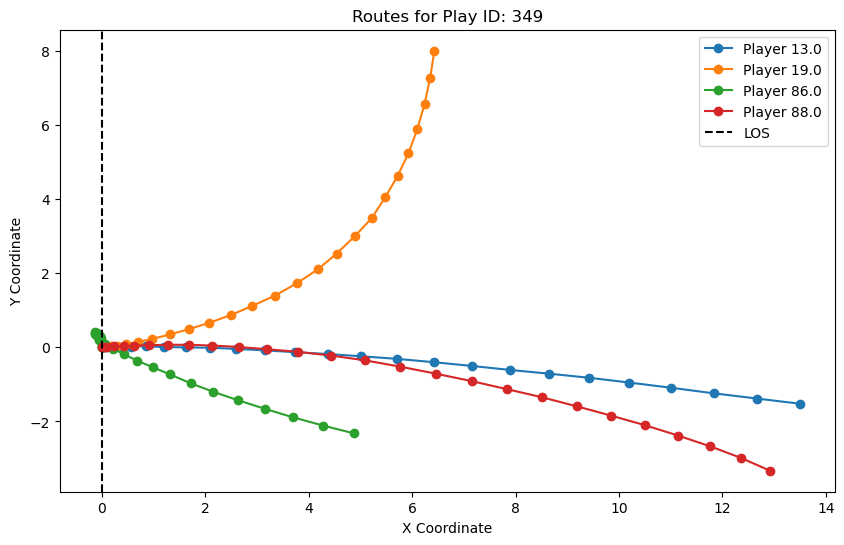

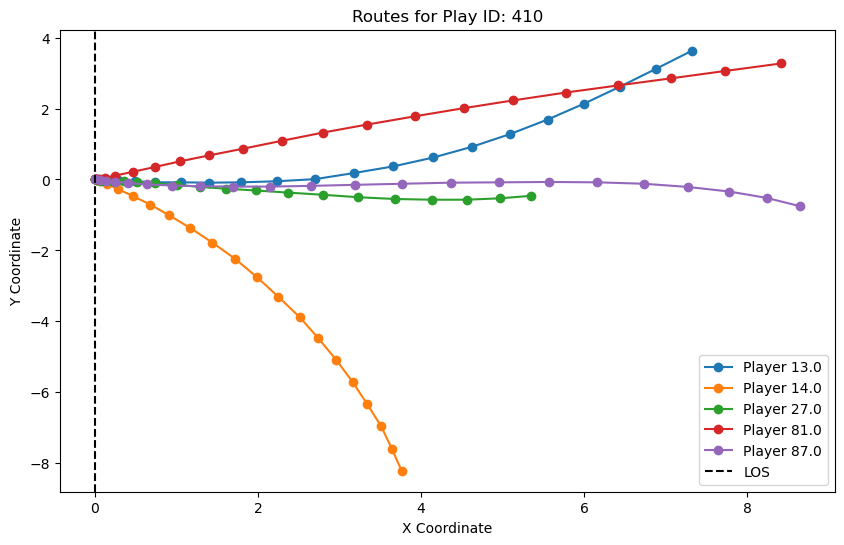

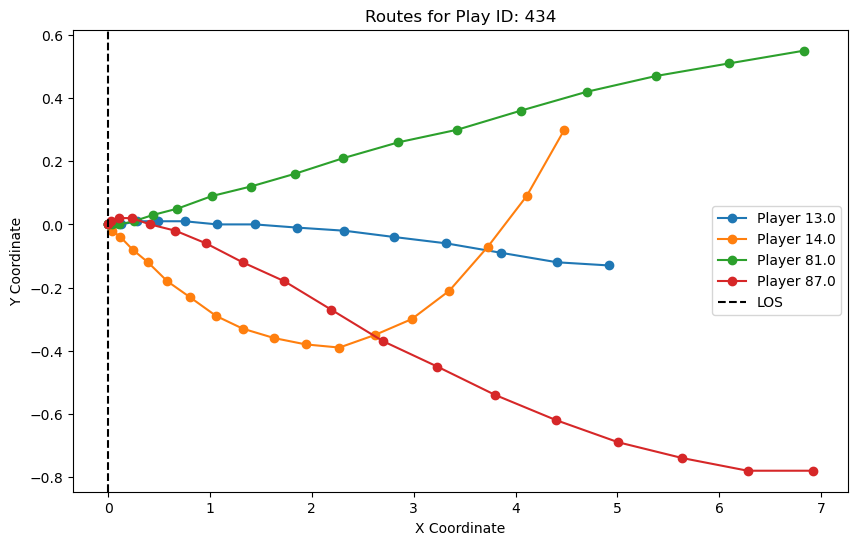

In [43]:
unique_plays = trimmed_weeks[0][['gameId', 'playId']].drop_duplicates()


counter = 0
for (gameId, playId), play_data in trimmed_weeks[0].groupby(['gameId', 'playId']):
    if counter > 6:
        break
    play_start = play_data[play_data['event'] == 'ball_snap']['frameId']
    play_end =  play_data[play_data['event'].isin(['pass_arrived', 'qb_strip_sack', 'qb_sack', 'pass_tipped'])]['frameId']
    
    if play_end.empty:
        play_end = play_data[play_data['event'].isin(['pass_forward'])]['frameId']
    
    if not play_start.empty and not play_end.empty:
        play_start = play_start.iloc[0]
        play_end = play_end.iloc[0]
    
        route_data = play_data[(play_data['frameId'] >= play_start) & (play_data['frameId'] <= play_end)]
        
        plt.figure(figsize=(10,6))
        
        for player_id, player_data in route_data.groupby('jerseyNumber'):
            plt.plot(player_data['x'], player_data['y'], marker='o', linestyle='-', label=f'Player {player_id}')
        
        
        plt.axvline(x=0, color='black', linestyle='--', label='LOS')
        
        plt.title(f'Routes for Play ID: {playId}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        counter += 1
        plt.show()
    

In [44]:
for idx, df in enumerate(trimmed_weeks):
    df.to_csv(f'./data/week_{idx}_trimmed.csv')